<a href="https://colab.research.google.com/github/rii92/aktualisasi-kawan/blob/main/analisis_chatbot_kawan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mulai Analisis chatbot kawan

Install Package

In [3]:
# Install Package
%pip install pandas gdown matplotlib TextBlob transformers sentencepiece

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from transformers import MBartForConditionalGeneration, MBart50TokenizerFast

Reload Dataset transaksi chatbot kawan

In [5]:
import pandas as pd

def load_google_sheet(sheet_url):
    # Convert the Google Sheets URL to a CSV export link
    csv_export_url = sheet_url.replace('/edit?usp=drive_copy', '/export?format=xlsx')

    # Read the CSV data into a pandas DataFrame
    df = pd.read_excel(csv_export_url)

    return df

# Google Drive link to the dataset (transaksi chatbot)
sheet_url = 'https://drive.google.com/open?id=1GrxpyhB2IM9IbA5RWC6fTPh00-6j7KnV&usp=drive_copy'

# Modify the link for CSV export
sheet_url_csv = sheet_url.replace('/open?', '/uc?') + '&export=download'

# Load the data into a DataFrame
df = load_google_sheet(sheet_url_csv)
df["no"] = df["no"].astype(str)
df["message"] = df["message"].astype(str)

# Convert timestamps to datetime format for analysis
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df['currentTime'] = pd.to_datetime(df['currentTime'], format='%d/%m/%Y, %H.%M.%S')

df

,id,no,name,message,timestamp,currentTime,status
0,314e2eaf-fdab-476a-8154-af07fe1f542d,6289693967005,A Rio,Layanan,2024-07-13 01:44:37.888,2024-07-13 08:44:37,receive
1,5e653140-56a2-49b0-8fa9-e480e310c6a2,6289693967005,A Rio,3,2024-07-13 01:44:38.032,2024-07-13 08:44:38,receive
2,ddddfdc6-bad7-469f-8f96-969c61f19454,6285176957005,BotKawan,"Untuk mengakses layanan perpustakaan, Anda bis...",2024-07-13 01:44:42.194,2024-07-13 08:44:42,send
3,56ba52a8-ea50-4816-acad-a58b588a0c72,6285176957005,BotKawan,Berikut Beberapa informasi yang ada3. Layanan ...,2024-07-13 01:44:42.721,2024-07-13 08:44:42,send
4,22f03fe5-b357-4edb-8e30-fdc614c2c948,6285707179005,Grujs Farhan Nafis (Bps Sanggau),Tes,2024-07-13 01:45:38.619,2024-07-13 08:45:38,receive
...,...,...,...,...,...,...,...
1459,c97dc09c-fb53-4fbe-aab4-a5c5b2077406,6285176957005,BotKawan,"Berdasarkan informasi yang tersedia, tidak ada...",2024-07-17 10:11:00.842,2024-07-17 17:11:00,send
1460,0a5a82ac-0b29-406f-88ce-d54cc89c0e75,6289693967005,A Rio,Halo,2024-07-18 00:20:52.255,2024-07-18 07:20:52,receive
1461,165bac1a-1dc2-4a84-8ec1-20a1ebbbce18,6285176957005,BotKawan,Hai! 👋 Selamat datang di Layanan Informasi BPS...,2024-07-18 00:21:29.034,2024-07-18 07:21:29,send
1462,0eeacd22-11ea-49aa-b5f3-09aafaa41311,6289693967005,A Rio,siapa nama kepala bps kabupaten sanggau,2024-07-18 02:17:59.268,2024-07-18 09:17:59,receive


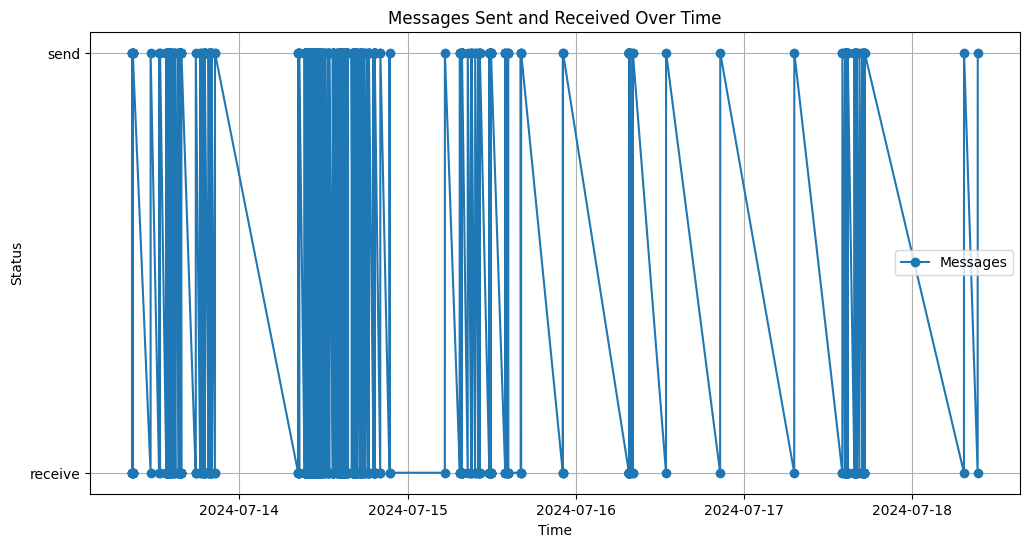

In [6]:
# Plotting the number of messages sent and received over time
plt.figure(figsize=(12, 6))
plt.plot(df['currentTime'], df['status'], 'o-', label='Messages')
plt.xlabel('Time')
plt.ylabel('Status')
plt.title('Messages Sent and Received Over Time')
plt.legend()
plt.grid(True)
plt.show()

Grafik menunjukkan pola pengiriman dan penerimaan pesan oleh chatbot Kawan BPS Sanggau dalam rentang waktu yang ditentukan. Dari data ini, kita bisa mengamati beberapa hal:

1.   **Frekuensi Pesan**: Ada banyak pesan yang dikirim dan diterima dalam periode yang sama. Hal ini menunjukkan bahwa chatbot sering berinteraksi dengan pengguna, baik dalam menjawab pertanyaan maupun menerima masukan.
2.   **Polanya**: Tidak ada pola yang jelas kapan pesan dikirim atau diterima, menunjukkan bahwa interaksi terjadi secara acak sepanjang hari. Ini menunjukkan bahwa pengguna menggunakan chatbot kapan saja sesuai kebutuhan mereka.
3.   **Keberhasilan Interaksi**: Semua pesan yang dikirim tampaknya diterima dan dijawab, menunjukkan bahwa sistem chatbot berfungsi dengan baik dalam menangani permintaan pengguna.




In [7]:
# Analysis of message types
message_counts = df['status'].value_counts()
print(message_counts)

status
receive    778
send       686
Name: count, dtype: int64


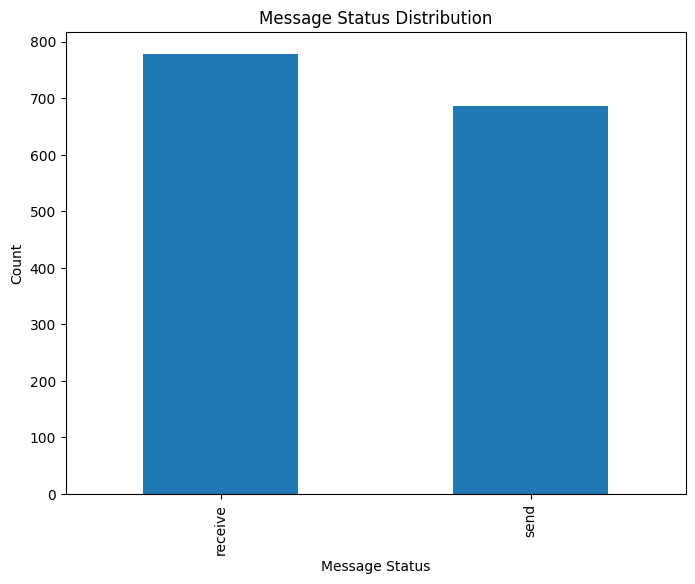

In [8]:
# Create a bar chart for message counts
message_counts.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Message Status')
plt.ylabel('Count')
plt.title('Message Status Distribution')
plt.show()

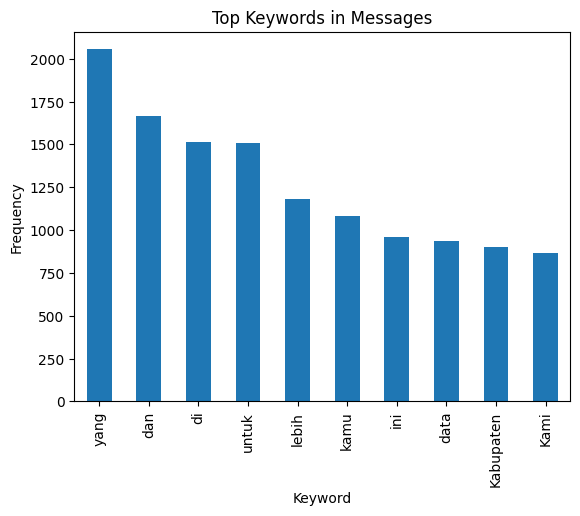

In [9]:
from collections import Counter

top_keywords = Counter(" ".join(df['message']).split()).most_common(10)
top_keywords_df = pd.DataFrame(top_keywords, columns=['Keyword', 'Frequency'])

# Plot top keywords
top_keywords_df.plot(kind='bar', x='Keyword', y='Frequency', legend=False, title='Top Keywords in Messages')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.show()

In [10]:
user_counts = df['no'].nunique()
print(f"Total unique users: {user_counts}")

Total unique users: 151


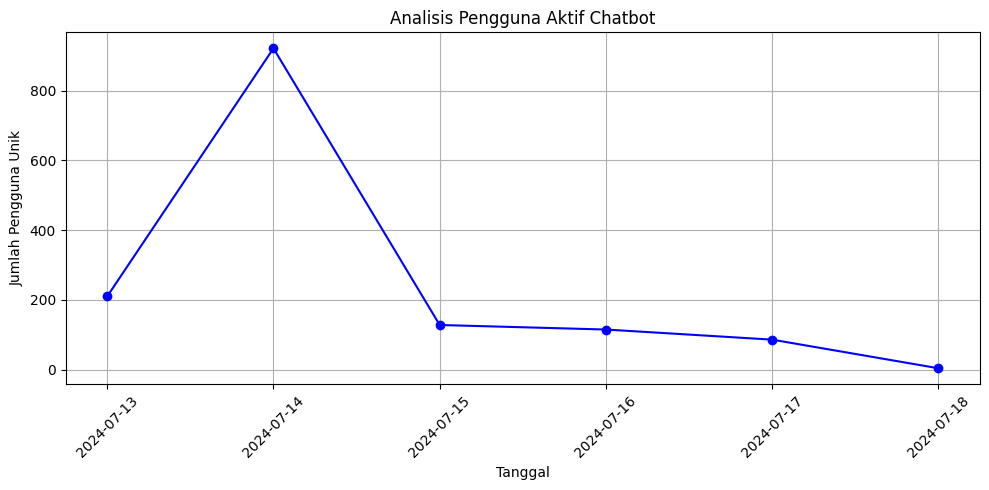

In [11]:
# Extracting date for grouping
df['date'] = df['timestamp'].dt.date

# Group by date and count unique users
user_activity = df.groupby('date')['id'].nunique().reset_index(name='unique_users')

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(user_activity['date'], user_activity['unique_users'], marker='o', linestyle='-', color='b')
plt.title('Analisis Pengguna Aktif Chatbot')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pengguna Unik')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# Memisahkan DataFrame berdasarkan status
df_receive = df[df['status'] == 'receive']
df_send = df[df['status'] == 'send']
df_receive

,id,no,name,message,timestamp,currentTime,status,date
0,314e2eaf-fdab-476a-8154-af07fe1f542d,6289693967005,A Rio,Layanan,2024-07-13 01:44:37.888,2024-07-13 08:44:37,receive,2024-07-13
1,5e653140-56a2-49b0-8fa9-e480e310c6a2,6289693967005,A Rio,3,2024-07-13 01:44:38.032,2024-07-13 08:44:38,receive,2024-07-13
4,22f03fe5-b357-4edb-8e30-fdc614c2c948,6285707179005,Grujs Farhan Nafis (Bps Sanggau),Tes,2024-07-13 01:45:38.619,2024-07-13 08:45:38,receive,2024-07-13
6,3d1f0934-73de-4ded-9df7-883d2e2e5d54,6285707179005,Grujs Farhan Nafis (Bps Sanggau),Layanan,2024-07-13 01:45:55.528,2024-07-13 08:45:55,receive,2024-07-13
8,f276b1e9-ea5a-4a94-96f5-ee1a0454821a,6285707179005,Grujs Farhan Nafis (Bps Sanggau),3,2024-07-13 01:46:28.833,2024-07-13 08:46:28,receive,2024-07-13
...,...,...,...,...,...,...,...,...
1454,61bcbb9e-6c0c-42fd-a3e9-a98ad9c91fb8,6282304165446,undefined,Apakah anda sudah makan?,2024-07-17 10:08:35.109,2024-07-17 17:08:35,receive,2024-07-17
1456,f163c7c9-2180-4cd2-8650-fe850fc65528,6282304165446,undefined,Apakah anda sudah makan siang?,2024-07-17 10:09:17.692,2024-07-17 17:09:17,receive,2024-07-17
1458,468c6d17-43d8-4642-8a0e-8f551db06c65,6282304165446,undefined,Hari ini hari apa ya?,2024-07-17 10:09:33.775,2024-07-17 17:09:33,receive,2024-07-17
1460,0a5a82ac-0b29-406f-88ce-d54cc89c0e75,6289693967005,A Rio,Halo,2024-07-18 00:20:52.255,2024-07-18 07:20:52,receive,2024-07-18


In [ ]:
# drop duplikat
df_receive_unique

def translate_text(text):
    src_lang = "id_ID"
    tgt_lang = "en_XX"
    # Load model and tokenizer
    model = MBartForConditionalGeneration.from_pretrained('facebook/mbart-large-50-many-to-many-mmt')
    tokenizer = MBart50TokenizerFast.from_pretrained('facebook/mbart-large-50-many-to-many-mmt')

    # Apply the tokenizer to the input text, using the appropriate source and target language codes
    tokenizer.src_lang = src_lang
    encoded_text = tokenizer(text, return_tensors="pt")

    # Generate translation using the model
    translated = model.generate(**encoded_text, forced_bos_token_id=tokenizer.lang_code_to_id[tgt_lang])

    # Decode it and return the result
    return tokenizer.batch_decode(translated, skip_special_tokens=True)[0]

# Analisis Saran dan masukkan berikut

In [13]:
# Google Drive link to the dataset (saran dan masukkan)
sheet_url = 'https://drive.google.com/open?id=1Gr3ZgRBnUBfzxZ711namkfqyNDKk4Hku&usp=drive_copy'

# Modify the link for CSV export
sheet_url_csv = sheet_url.replace('/open?', '/uc?') + '&export=download'

# Load the data into a DataFrame
data = load_google_sheet(sheet_url_csv)

# Convert timestamps to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Display the first few rows of the dataset
print(data.head())

                      Timestamp                 Email Address  \
0 1970-01-01 00:00:00.000045486          riofebri16@gmail.com   
1 1970-01-01 00:00:00.000045486     yovi.wibowo1998@gmail.com   
2 1970-01-01 00:00:00.000045486           musifah54@gmail.com   
3 1970-01-01 00:00:00.000045486    mochammadfarkhan@gmail.com   
4 1970-01-01 00:00:00.000045486  ilmanmaulana142312@gmail.com   

  Seberapa mudah Anda menemukan chatbot di WhatsApp?  \
0                                       Sangat Mudah   
1                                              Mudah   
2                                       Sangat Mudah   
3                                       Sangat Mudah   
4                                              Cukup   

  Apakah Anda merasa bahwa chatbot mudah digunakan?  \
0                                     Sangat Setuju   
1                                            Setuju   
2                                            Setuju   
3                                            Setuju 

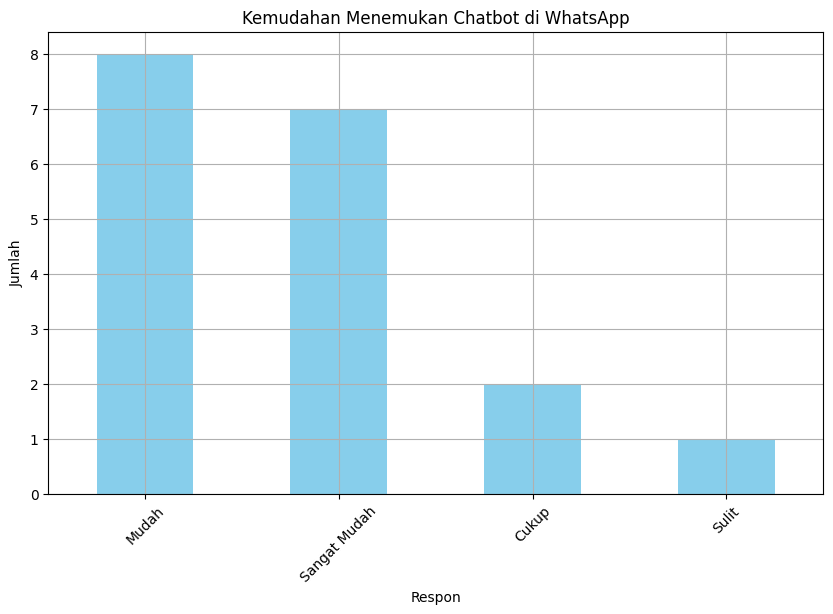

In [14]:
# Count the frequency of responses for ease of finding and using the chatbot
ease_of_use_counts = data['Seberapa mudah Anda menemukan chatbot di WhatsApp?'].value_counts()
ease_of_use_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Kemudahan Menemukan Chatbot di WhatsApp')
plt.xlabel('Respon')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

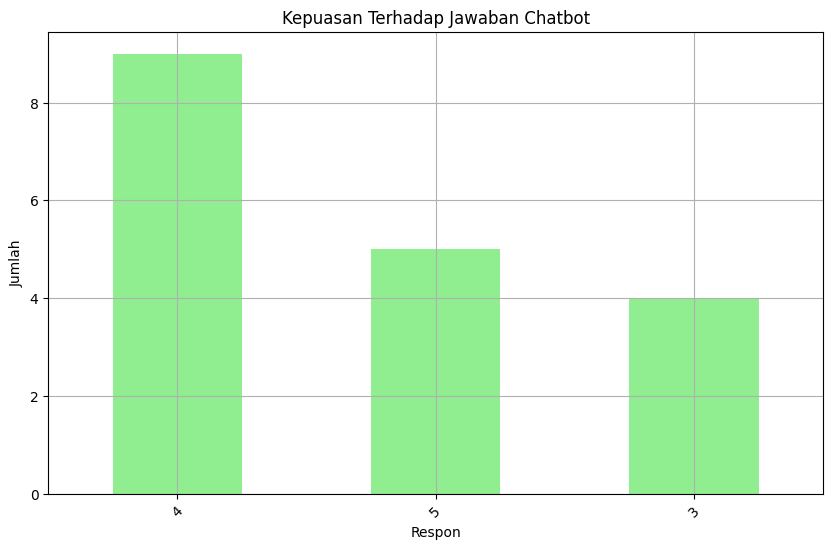

In [15]:
# Count the frequency of responses for satisfaction with chatbot's response
satisfaction_counts = data['Seberapa puas Anda dengan jawaban yang diberikan oleh chatbot?'].value_counts()
satisfaction_counts.plot(kind='bar', color='lightgreen', figsize=(10, 6))
plt.title('Kepuasan Terhadap Jawaban Chatbot')
plt.xlabel('Respon')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()